Installation:
Run the following command:

**pip install jupyter matplotlib scipy sklearn**

In [4]:
%matplotlib inline
"""
"""
# Import packages.
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from scipy.io import wavfile
from scipy import linalg as LA
from numpy.random import randn as RNDN


In [5]:
from scipy.io import wavfile

def read_audio_file(file_to_read):
    sampling_rate, d = wavfile.read(file_to_read)
    return (sampling_rate,d)

def display_audio_file(file_to_display):
    plt.plot(file_to_display, color='steelblue')
    plt.title('Timeseries example')
    plt.xlim(0, len(file_to_display))
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude (signed 16 bit)')
    plt.figure()

def uniqueish_color(color_index):
    try:
        if color_index==0:
            return 'steelblue'
        return 'r'
    except:
        print('color index:',color_index)
        return 'g'
    
def display_audio_file_complete(array_list):
    pos_signal = array_list.copy()
    neg_signal = array_list.copy()
    pos_signal[pos_signal[:,1] < 0] = np.ma.masked
    neg_signal[neg_signal >= 0] = np.ma.masked
    plt.style.use('fivethirtyeight')
    plt.plot(pos_signal, color='r')
    plt.plot(neg_signal, color='b')
    plt.title('Timeseries example')
    plt.xlim(0, len(array_list))
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude (signed 16 bit)')
    plt.figure()

    
def write_audio_file(file_name,sampling_rate,data):
    wavfile.write(file_name+'.wav', sampling_rate, data)



file_path= "test01.wav"
sampling_rate,file_data= read_audio_file(file_path)
print('shape',file_data.shape)
print('type:',type(file_data))
print(sampling_rate, file_data,len(file_data))

#Rewrite the file just to check if we can write audio properly.
write_audio_file('out/checkfile1',sampling_rate,file_data)

    


shape (220500, 2)
type: <class 'numpy.ndarray'>
44100 [[  0   0]
 [  0   0]
 [  0   0]
 ..., 
 [142 215]
 [157 247]
 [154 251]] 220500


unique predictions: [0 1]
stacked array shape :  (220500, 3)


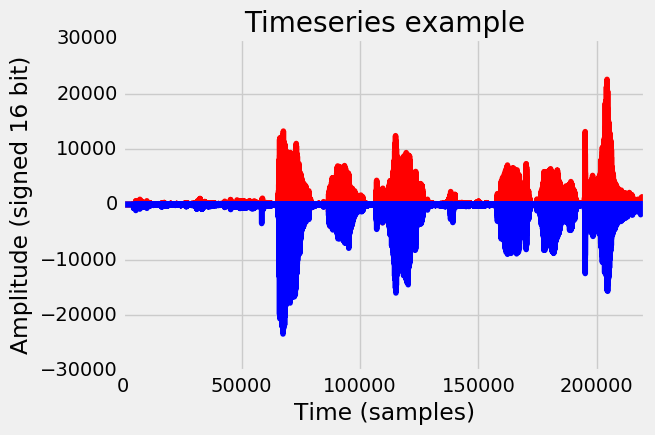

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(2, max_iter = 1000, n_init = 100)
kmeans.fit_transform(file_data)
predictions = kmeans.predict(file_data)
print('unique predictions:',np.unique(predictions))
wave_files_with_predictions= np.column_stack((predictions,file_data))
split_array_list = np.split(wave_files_with_predictions[:,:], np.where(np.diff(wave_files_with_predictions[:,0]))[0]+1)
stacked_array=np.vstack(split_array_list)
#print('stacked array: ',stacked_array)
print('stacked array shape : ',stacked_array.shape)
# display_audio_file(file_data)
display_audio_file_complete(stacked_array)
    

In [8]:
# Clean output
import glob, os

filelist = glob.glob("out/out*.wav")
for f in filelist:
    print(f)
    os.remove(f)